## Project Milestone 3

In [1]:
# Some basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from statsmodels.stats import diagnostic
from scipy import stats
import networkx as nx
import statsmodels.api as sm
import statsmodels.formula.api as smf
import plotly.express as px

In [2]:
# load the data 
final_dataset_df_path = 'data/processed_data/success_movies.csv'
ethnicity_sucess_df = pd.read_csv(final_dataset_df_path)

In [3]:
def reclean_data(dataframe): 
    final_df =dataframe.dropna(subset=['diversity'])
    final_df= final_df[final_df["actor_number"] != 1]
    final_df =final_df.dropna(subset=['Movie_box_office_revenue'])
    print(len(final_df))


In [4]:
reclean_data(ethnicity_sucess_df)

1370


In [5]:
ethnicity_sucess_df=ethnicity_sucess_df[ethnicity_sucess_df["actor_number"] != 1]
len(ethnicity_sucess_df)

13837

In [6]:
dataset_reduit= ethnicity_sucess_df.dropna(subset=['diversity'])
dataset_reduit= dataset_reduit.dropna(subset=['Movie_box_office_revenue'])
dataset_reduit= dataset_reduit[dataset_reduit["actor_number"] != 1]
len(dataset_reduit)

1370

### 1) Introduction

What is the distribution of the diversity score implemented?

In [7]:
# plot histogram of the distribution of diversity scores
fig = px.histogram(ethnicity_sucess_df['diversity'], x="diversity", color_discrete_sequence=["#A01812"],title="Distribution of Diversity Scores")
fig.write_html("diversity_histogram_essai.html")
fig.show()

In [46]:
fig = px.histogram(dataset_reduit['diversity'], x="diversity",color_discrete_sequence=["#A01812"],title="Distribution of Diversity Scores for the reduced dataset")
fig.write_html("diversity_histogram_reduced.html")
fig.show()

How does the diversity score evolves over time? 

In [57]:
def plot_evolution_basic(dataframe):
    diversity_by_year = dataframe.groupby(dataframe['Movie_release_date']).apply(lambda x: pd.Series({
        'average_diversity': x['diversity'].mean(),
        'std_diversity': x['diversity'].std()
    }))	

    plt.plot(diversity_by_year.index, diversity_by_year.average_diversity)
    plt.title('Average diversity score')
    plt.xlabel('Year')
    plt.ylabel('Diversity Score')
    plt.legend()
    plt.show()

In [67]:
import plotly.graph_objects as go
def plot_evolution(dataframe):
    diversity_by_year = dataframe.groupby(dataframe['Movie_release_date']).apply(lambda x: pd.Series({
        'average_diversity': x['diversity'].mean(),
        'std_diversity': x['diversity'].std()
    }))

    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=diversity_by_year.index,
        y=diversity_by_year.average_diversity,
        mode='lines+markers',
        name='Average Diversity',
        line=dict(color='#A01812'),
        marker=dict(size=8)
    ))

    # Add a title and axis labels
    fig.update_layout(
        title="Evolution of the diversity score overtime for the reduced dataset",
        xaxis_title="Year",
        yaxis_title="Diversity Score",
        legend_title="Metrics",
        template="plotly_white"
    )

    # Show the interactive plot
    fig.show()


In [66]:
plot_evolution(ethnicity_sucess_df)
fig.write_html("evolution_overtime.html")

/var/folders/w7/t9sglxkj5nz7xv4mxk5dftlh0000gn/T/ipykernel_2333/3160094185.py:4: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [68]:
plot_evolution(dataset_reduit)
fig.write_html("evolution_overtime_reduced.html")

/var/folders/w7/t9sglxkj5nz7xv4mxk5dftlh0000gn/T/ipykernel_2333/3692408783.py:3: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [55]:
fig = px.histogram(ethnicity_sucess_df['Movie_release_date'], x="Movie_release_date",color_discrete_sequence=["#6CA9B3"],title="Distribution of Movies release date")
fig.write_html("distribution_realease_date.html")
fig.show()

In [56]:
fig = px.histogram(dataset_reduit['Movie_release_date'], x="Movie_release_date",color_discrete_sequence=["#6CA9B3"],title="Distribution of Movies release date for the reduced dataset")
fig.write_html("distribution_realease_date.html")
fig.show()

In [69]:
def courbe_tendance_basic(dataframe):
    filtered_df = dataframe[ethnicity_sucess_df['Movie_release_date'].between(1960, 2023)]
    diversity_by_year = filtered_df.groupby(filtered_df['Movie_release_date']).apply(
    lambda x: pd.Series({'average_diversity': x['diversity'].mean()})
)
    plt.plot(diversity_by_year.index, diversity_by_year['average_diversity'], label='Diversity Score')

    z = np.polyfit(diversity_by_year.index, diversity_by_year['average_diversity'], 1)  # Ajustement linéaire
    p = np.poly1d(z)
    plt.plot(diversity_by_year.index, p(diversity_by_year.index), "r--", label='Trend Line')

    plt.xlabel('Year')
    plt.ylabel('Diversity Score')
    plt.title('Average diversity score (1960-2023)')
    plt.legend()
    plt.show()

In [18]:
import plotly.graph_objects as go
import plotly.io as pio

def courbe_tendance(dataframe):
    # Filter the data for the years between 1960 and 2023
    filtered_df = dataframe[dataframe['Movie_release_date'].between(1960, 2023)]
    
    # Group the data by year and calculate average diversity
    diversity_by_year = filtered_df.groupby(filtered_df['Movie_release_date']).apply(
        lambda x: pd.Series({'average_diversity': x['diversity'].mean()})
    ).reset_index()

    # Linear regression (trend line)
    z = np.polyfit(diversity_by_year['Movie_release_date'], diversity_by_year['average_diversity'], 1)
    p = np.poly1d(z)
    
    # Create the figure
    fig = go.Figure()

    # Add line for average diversity score
    fig.add_trace(go.Scatter(
        x=diversity_by_year['Movie_release_date'],
        y=diversity_by_year['average_diversity'],
        mode='lines+markers',
        name='Average Diversity',
        line=dict(color='#A01812'),
        marker=dict(size=8, color='#A01812')
    ))

    # Add trend line
    fig.add_trace(go.Scatter(
        x=diversity_by_year['Movie_release_date'],
        y=p(diversity_by_year['Movie_release_date']),
        mode='lines',
        name='Trend Line',
        line=dict(color='#6CA9B3', dash='dash')
    ))

    # Customize the layout
    fig.update_layout(
        title="Evolution of the diversity score between 1960 and 2015 for the reduced dataset)",
        xaxis_title="Year",
        yaxis_title="Diversity Score",
        template="plotly_white",
        legend_title="Metrics"
    )

    # Show the interactive plot
    fig.show()
  


In [19]:
courbe_tendance(ethnicity_sucess_df)
plotly.io.write_html(fig)


/var/folders/w7/t9sglxkj5nz7xv4mxk5dftlh0000gn/T/ipykernel_1100/1406409154.py:9: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



NameError: name 'plotly' is not defined

In [83]:
courbe_tendance(dataset_reduit)
fig.write_html("courbe_tendance_dataset_reduit.html")

/var/folders/w7/t9sglxkj5nz7xv4mxk5dftlh0000gn/T/ipykernel_2333/3993168146.py:8: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



### 2)Correlation

In [85]:
print(stats.pearsonr(dataset_reduit['Movie_box_office_revenue'],dataset_reduit['diversity']))

PearsonRResult(statistic=np.float64(-0.019457112245118802), pvalue=np.float64(0.4717794509673837))


In [86]:
print(stats.pearsonr(ethnicity_sucess_df['Ratings'],ethnicity_sucess_df['diversity']))

PearsonRResult(statistic=np.float64(-0.016201426178340046), pvalue=np.float64(0.05668404195699037))


In [87]:
print(stats.spearmanr(ethnicity_sucess_df['Nomination'],ethnicity_sucess_df['diversity']))

SignificanceResult(statistic=np.float64(0.07275896758602955), pvalue=np.float64(1.041344475652701e-17))


In [88]:
print(stats.spearmanr(ethnicity_sucess_df['Success'],ethnicity_sucess_df['diversity']))

SignificanceResult(statistic=np.float64(-0.054888744652983344), pvalue=np.float64(1.0408685217974587e-10))


### 3) Statistic analysis 

Is diversity higher in sucessful movies compared to less successful movies ?

In [ ]:
def mean_diversity_basic (threshold_revenue, threshold_ratings, dataframe):
    dataframe['Success'] = (dataframe['Ratings'] >threshold_ratings ) | (dataframe['Nomination'] == 'True') | (dataframe['Movie_box_office_revenue'] > threshold_revenue)

    diversite_nomination_1=dataframe.loc[dataframe['Nomination'] == True]['diversity'].mean()
    
    diversite_ratings_1=dataframe.loc[dataframe['Ratings'] > threshold_ratings ]['diversity'].mean()
    diversite_overall_1=dataframe.loc[dataframe['Success'] == True]['diversity'].mean()

    diversite_nomination_0=dataframe.loc[dataframe['Nomination'] == False]['diversity'].mean()
    
    diversite_ratings_0=dataframe.loc[dataframe['Ratings'] <= threshold_ratings ]['diversity'].mean()
    diversite_overall_0=dataframe.loc[dataframe['Success'] == False]['diversity'].mean()

    print(f"Average diversity for film nominated:{diversite_nomination_1:.4f}")
    print(f"Average diversity for film not nominated:{diversite_nomination_0:.4f}")

    print(f"Average diversity for film with high ratings:{diversite_ratings_1:.4f}")
    print(f"Average diversity for film with lower ratings:{diversite_ratings_0:.4f}")

    print(f"Average diversity for film sucessful :{diversite_overall_1:.4f}")
    print(f"Average diversity for film less sucessful :{diversite_overall_0:.4f}") 
    
    # Plot results
    categories = ['Nominated', 'Not Nominated']
    diversity_nomination = [diversite_nomination_1, diversite_nomination_0]
    categories_ratings = ['High Ratings', 'Low Ratings']
    diversity_ratings = [diversite_ratings_1, diversite_ratings_0]
    categories_success = ['Successful', 'Not Successful']
    diversity_success = [diversite_overall_1, diversite_overall_0]

# Define the custom palette
    custom_palette = ['#B77526', '#A01812']

# Create the figure and subplots
    fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=True)

# First plot: Nomination
    sns.barplot(x=categories, y=diversity_nomination, ax=axes[0], palette=custom_palette)
    axes[0].set_title('Diversity: Nomination')
    axes[0].set_ylabel('Average Diversity')
    axes[0].set_ylim(0, 1)  # Adjust based on your diversity score range
    axes[0].set_xticks(range(len(categories)))
    axes[0].set_xticklabels(categories, rotation=30)

# Third plot: Ratings
    sns.barplot(x=categories_ratings, y=diversity_ratings, ax=axes[1], palette=custom_palette)
    axes[1].set_title('Diversity: Ratings')
    axes[1].set_xticks(range(len(categories_ratings)))
    axes[1].set_xticklabels(categories_ratings, rotation=30)

# Fourth plot: Success
    sns.barplot(x=categories_success, y=diversity_success, ax=axes[2], palette=custom_palette)
    axes[2].set_title('Diversity: Success')
    axes[2].set_xticks(range(len(categories_success)))
    axes[2].set_xticklabels(categories_success, rotation=30)

# Adjust layout
    plt.tight_layout()
    plt.show()

In [ ]:
import plotly.graph_objects as go

def mean_diversity(threshold_revenue, threshold_ratings, dataframe):
    dataframe['Success'] = (dataframe['Ratings'] > threshold_ratings) | (dataframe['Nomination'] == 'True') | (dataframe['Movie_box_office_revenue'] > threshold_revenue)
    diversite_nomination_1 = dataframe.loc[dataframe['Nomination'] == True]['diversity'].mean()
    diversite_ratings_1 = dataframe.loc[dataframe['Ratings'] > threshold_ratings]['diversity'].mean()
    diversite_overall_1 = dataframe.loc[dataframe['Success'] == True]['diversity'].mean()
    diversite_nomination_0 = dataframe.loc[dataframe['Nomination'] == False]['diversity'].mean()
    diversite_ratings_0 = dataframe.loc[dataframe['Ratings'] <= threshold_ratings]['diversity'].mean()
    diversite_overall_0 = dataframe.loc[dataframe['Success'] == False]['diversity'].mean()
    print(f"Average diversity for film nominated: {diversite_nomination_1:.4f}")
    print(f"Average diversity for film not nominated: {diversite_nomination_0:.4f}")
    print(f"Average diversity for film with high ratings: {diversite_ratings_1:.4f}")
    print(f"Average diversity for film with lower ratings: {diversite_ratings_0:.4f}")
    print(f"Average diversity for film successful: {diversite_overall_1:.4f}")
    print(f"Average diversity for film less successful: {diversite_overall_0:.4f}")

    # Prepare data for interactive bar plots
    categories = ['Nominated', 'Not Nominated']
    diversity_nomination = [diversite_nomination_1, diversite_nomination_0]
    categories_ratings = ['High Ratings', 'Low Ratings']
    diversity_ratings = [diversite_ratings_1, diversite_ratings_0]
    categories_success = ['Successful', 'Not Successful']
    diversity_success = [diversite_overall_1, diversite_overall_0]

    # Create the interactive bar plots
    fig = go.Figure()

    # Plot for Nomination
    fig.add_trace(go.Bar(
        x=categories, y=diversity_nomination,
        name='Nomination',
        marker=dict(color=['#B77526', '#A01812'])
    ))

    # Plot for Ratings
    fig.add_trace(go.Bar(
        x=categories_ratings, y=diversity_ratings,
        name='Ratings',
        marker=dict(color=['#B77526', '#A01812']),
    
    ))

    # Plot for Success
    fig.add_trace(go.Bar(
        x=categories_success, y=diversity_success,
        name='Success',
        marker=dict(color=['#B77526', '#A01812']),
    
    ))

    # Update layout for better appearance
    fig.update_layout(
        title="Diversity Analysis by Different Factors",
        barmode='group',
        xaxis_title="Categories",
        yaxis_title="Average Diversity",
        xaxis_tickangle=-30,
        showlegend=True
    )

    # Show the interactive plot
    fig.show()

In [ ]:
import plotly.graph_objects as go

def mean_diversity(threshold_revenue, threshold_ratings, dataframe):
    dataframe['Success'] = (dataframe['Ratings'] > threshold_ratings) | (dataframe['Nomination'] == 'True') | (dataframe['Movie_box_office_revenue'] > threshold_revenue)
    diversite_nomination_1 = dataframe.loc[dataframe['Nomination'] == True]['diversity'].mean()
    diversite_ratings_1 = dataframe.loc[dataframe['Ratings'] > threshold_ratings]['diversity'].mean()
    diversite_overall_1 = dataframe.loc[dataframe['Success'] == True]['diversity'].mean()
    diversite_nomination_0 = dataframe.loc[dataframe['Nomination'] == False]['diversity'].mean()
    diversite_ratings_0 = dataframe.loc[dataframe['Ratings'] <= threshold_ratings]['diversity'].mean()
    diversite_overall_0 = dataframe.loc[dataframe['Success'] == False]['diversity'].mean()
    print(f"Average diversity for film nominated: {diversite_nomination_1:.4f}")
    print(f"Average diversity for film not nominated: {diversite_nomination_0:.4f}")
    print(f"Average diversity for film with high ratings: {diversite_ratings_1:.4f}")
    print(f"Average diversity for film with lower ratings: {diversite_ratings_0:.4f}")
    print(f"Average diversity for film successful: {diversite_overall_1:.4f}")
    print(f"Average diversity for film less successful: {diversite_overall_0:.4f}")

    # Prepare data for interactive bar plots
    categories = ['Nominated', 'Not Nominated']
    diversity_nomination = [diversite_nomination_1, diversite_nomination_0]
    categories_ratings = ['High Ratings', 'Low Ratings']
    diversity_ratings = [diversite_ratings_1, diversite_ratings_0]
    categories_success = ['Successful', 'Not Successful']
    diversity_success = [diversite_overall_1, diversite_overall_0]

    # Create the interactive bar plots
    fig = go.Figure()

    # Plot for Nomination
    fig.add_trace(go.Bar(
        x=categories, y=diversity_nomination,
        name='Nomination',
        marker=dict(color=['#B77526', '#A01812'])
    ))

    # Plot for Ratings
    fig.add_trace(go.Bar(
        x=categories_ratings, y=diversity_ratings,
        name='Ratings',
        marker=dict(color=['#B77526', '#A01812']),
    
    ))

    # Plot for Success
    fig.add_trace(go.Bar(
        x=categories_success, y=diversity_success,
        name='Success',
        marker=dict(color=['#B77526', '#A01812']),
    
    ))

    # Update layout for better appearance
    fig.update_layout(
        title="Diversity Analysis by Different Factors",
        barmode='group',
        xaxis_title="Categories",
        yaxis_title="Average Diversity",
        xaxis_tickangle=-30,
        showlegend=True
    )

    # Show the interactive plot
    fig.show()

In [98]:
mean_diversity (38119483, 7.0, ethnicity_sucess_df)

Average diversity for film nominated: 0.6391
Average diversity for film not nominated: 0.5672
Average diversity for film with high ratings: 0.5031
Average diversity for film with lower ratings: 0.5998
Average diversity for film successful: 0.5129
Average diversity for film less successful: 0.5992


In [103]:
diversite_overall_1 = ethnicity_sucess_df.loc[ethnicity_sucess_df['Success'] == True]['diversity'].mean()
diversite_overall_0 = ethnicity_sucess_df.loc[ethnicity_sucess_df['Success'] == False]['diversity'].mean()
categories_success = ['Successful', 'Not Successful']
diversity_success = [diversite_overall_1, diversite_overall_0]

# Create the interactive bar plots
fig = go.Figure()

# Plot for Success
fig.add_trace(go.Bar(
        x=categories_success, y=diversity_success,
        name='Success',
        marker=dict(color=['#B77526', '#A01812']),
    
    ))
# Update layout for better appearance
fig.update_layout(
        title="Diversity Analysis by Different Factors",
        barmode='group',
        xaxis_title="Categories",
        yaxis_title="Average Diversity",
        xaxis_tickangle=-30,
        showlegend=True
    )

    # Show the interactive plot
fig.show()

In [65]:
get_t_test(38119483, 7.0, dataset_reduit)

Nomination:TtestResult(statistic=np.float64(0.47709061707865286), pvalue=np.float64(0.6333738007468193), df=np.float64(1368.0))
Box revenue:TtestResult(statistic=np.float64(-0.6685528464289106), pvalue=np.float64(0.5038935508242095), df=np.float64(1368.0))
Ratings:TtestResult(statistic=np.float64(-3.6841592049859795), pvalue=np.float64(0.00023841028602272524), df=np.float64(1368.0))
Success:TtestResult(statistic=np.float64(-2.2187581875198927), pvalue=np.float64(0.02666678776739524), df=np.float64(1368.0))


The diversity factor seems very slightly higher for film nominated and slightly lower for films with high box revenue. The diversity factor appears lower for films with high ratings.

Are those differences significant ? Let's do a t-test. 

In [60]:
def get_t_test(threshold_revenue, threshold_ratings,dataframe):
    dataframe['Success'] = (dataframe['Ratings'] >threshold_ratings ) | (dataframe['Nomination'] == 'True') | (dataframe['Movie_box_office_revenue'] > threshold_revenue)
    t_test_sucess=stats.ttest_ind(dataframe.loc[dataframe['Success'] == True]['diversity'], dataframe.loc[dataframe['Success'] == False]['diversity'])
    t_test_nomination=stats.ttest_ind(dataframe.loc[dataframe['Nomination'] == True]['diversity'], dataframe.loc[dataframe['Nomination'] == False]['diversity'])
    t_test_box=stats.ttest_ind(dataframe.loc[dataframe['Movie_box_office_revenue'] > threshold_revenue]['diversity'], dataframe.loc[dataframe['Movie_box_office_revenue'] <= threshold_revenue]['diversity'])
    t_test_ratings=stats.ttest_ind(dataframe.loc[dataframe['Ratings'] > threshold_ratings ]['diversity'], dataframe.loc[dataframe['Ratings'] <= threshold_ratings ]['diversity'])

    print(f"Nomination:{t_test_nomination}")
    print(f"Box revenue:{t_test_box}")
    print(f"Ratings:{t_test_ratings}")
    print(f"Success:{t_test_sucess}")

In [61]:
get_t_test(38119483, 7.0, ethnicity_sucess_df)

Nomination:TtestResult(statistic=np.float64(6.342479099595016), pvalue=np.float64(2.331273905599801e-10), df=np.float64(13835.0))
Box revenue:TtestResult(statistic=np.float64(-0.6685528464289106), pvalue=np.float64(0.5038935508242095), df=np.float64(1368.0))
Ratings:TtestResult(statistic=np.float64(-9.771993865397002), pvalue=np.float64(1.7556885390349882e-22), df=np.float64(13835.0))
Success:TtestResult(statistic=np.float64(-8.995244941826575), pvalue=np.float64(2.659565863332736e-19), df=np.float64(13835.0))


The significance threshold of the p value is 0.05. Therefore the difference in nominations, box office revenue, and success overall between successful films and less successful films is not significance. However this difference is significant for ratings. The statistics is -3, meaning that the more diverse the cast is, the lower the review are going to be. 

### 3) How does the threshold on film revenue and ratings influence the results? 

#### a) Ratings 

Average diversity for film nominated:0.6051
Average diversity for film not nominated:0.5882
Average diversity for film with high box revenue:0.5760
Average diversity for film with lower box revenue:0.5963
Average diversity for film with high ratings:0.5136
Average diversity for film with lower ratings:0.6183
Average diversity for film sucessful :0.5563
Average diversity for film less sucessful :0.6201


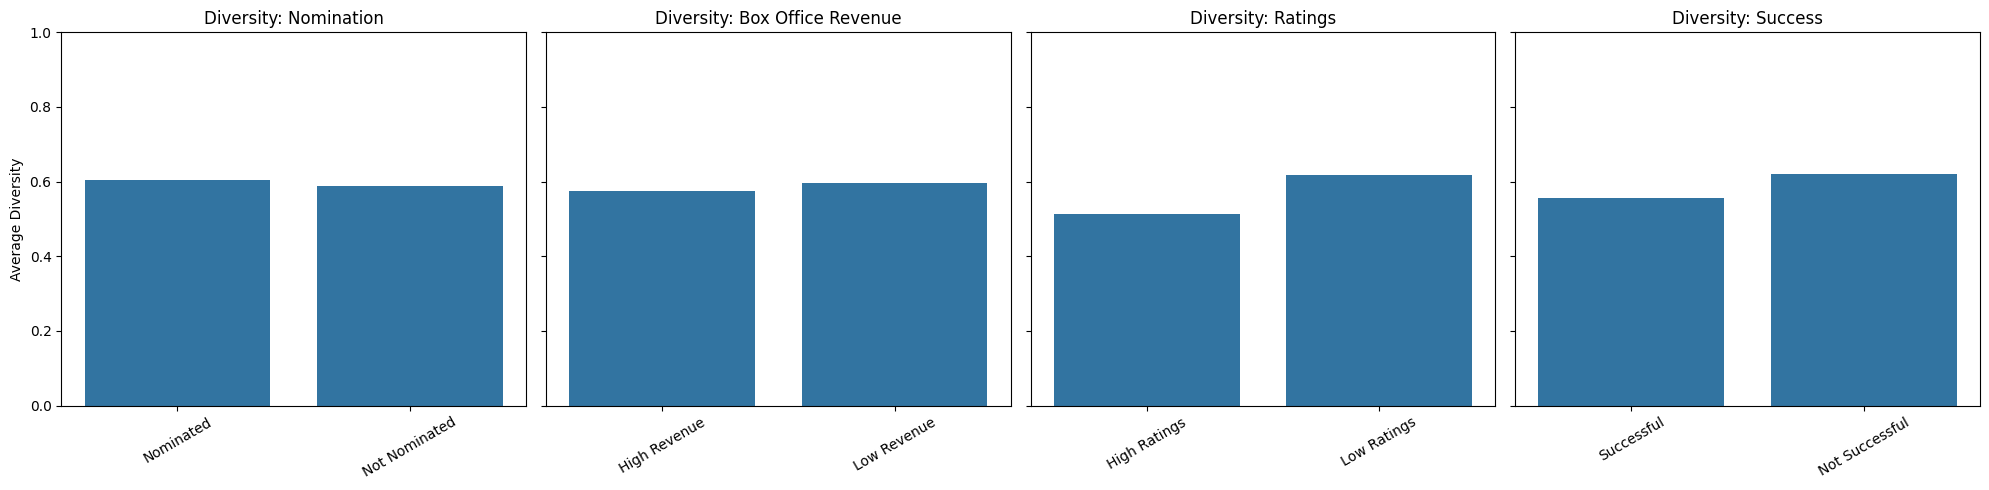

In [44]:
mean_diversity (38119483, 6.9, ethnicity_sucess_df)

Average diversity for film nominated:0.6051
Average diversity for film not nominated:0.5882
Average diversity for film with high box revenue:0.5760
Average diversity for film with lower box revenue:0.5963
Average diversity for film with high ratings:0.4806
Average diversity for film with lower ratings:0.6125
Average diversity for film sucessful :0.5517
Average diversity for film less sucessful :0.6154


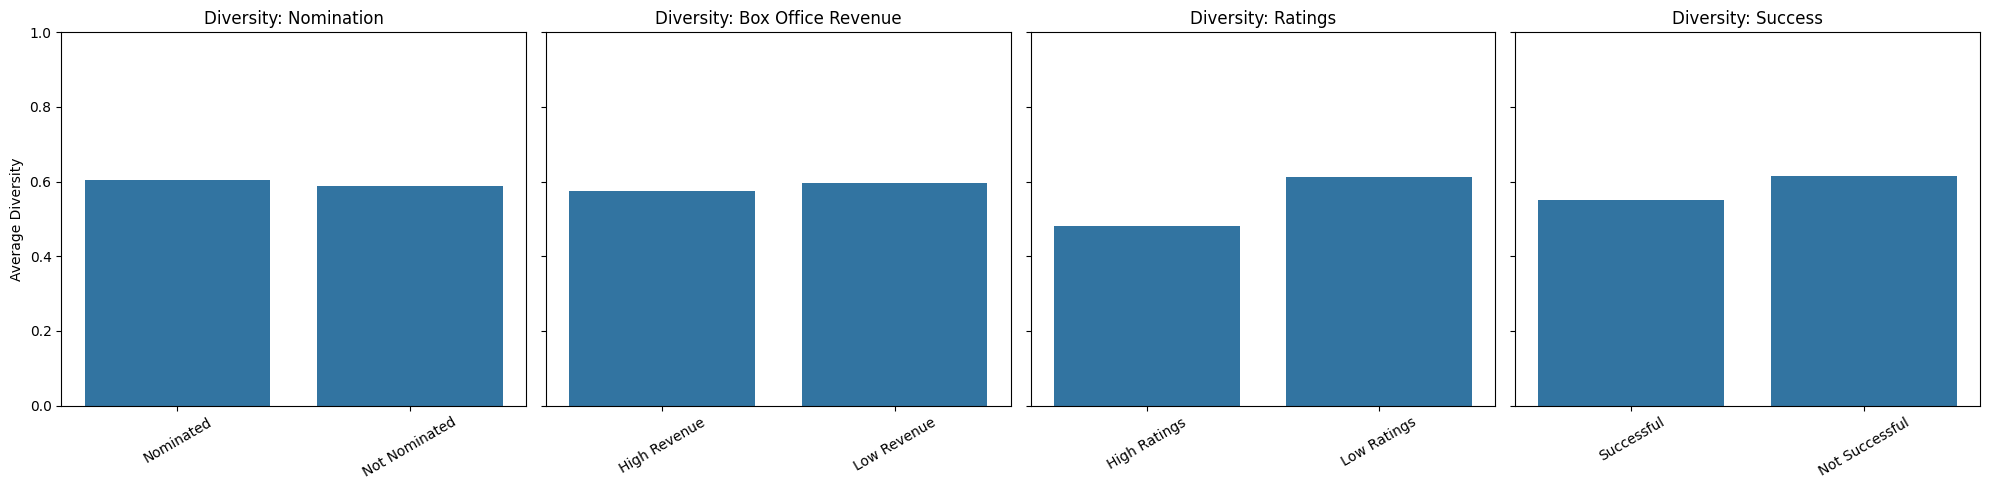

In [45]:
mean_diversity (38119483, 7.2, ethnicity_sucess_df)

Average diversity for film nominated:0.6051
Average diversity for film not nominated:0.5882
Average diversity for film with high box revenue:0.5760
Average diversity for film with lower box revenue:0.5963
Average diversity for film with high ratings:0.4600
Average diversity for film with lower ratings:0.5946
Average diversity for film sucessful :0.5669
Average diversity for film less sucessful :0.6004


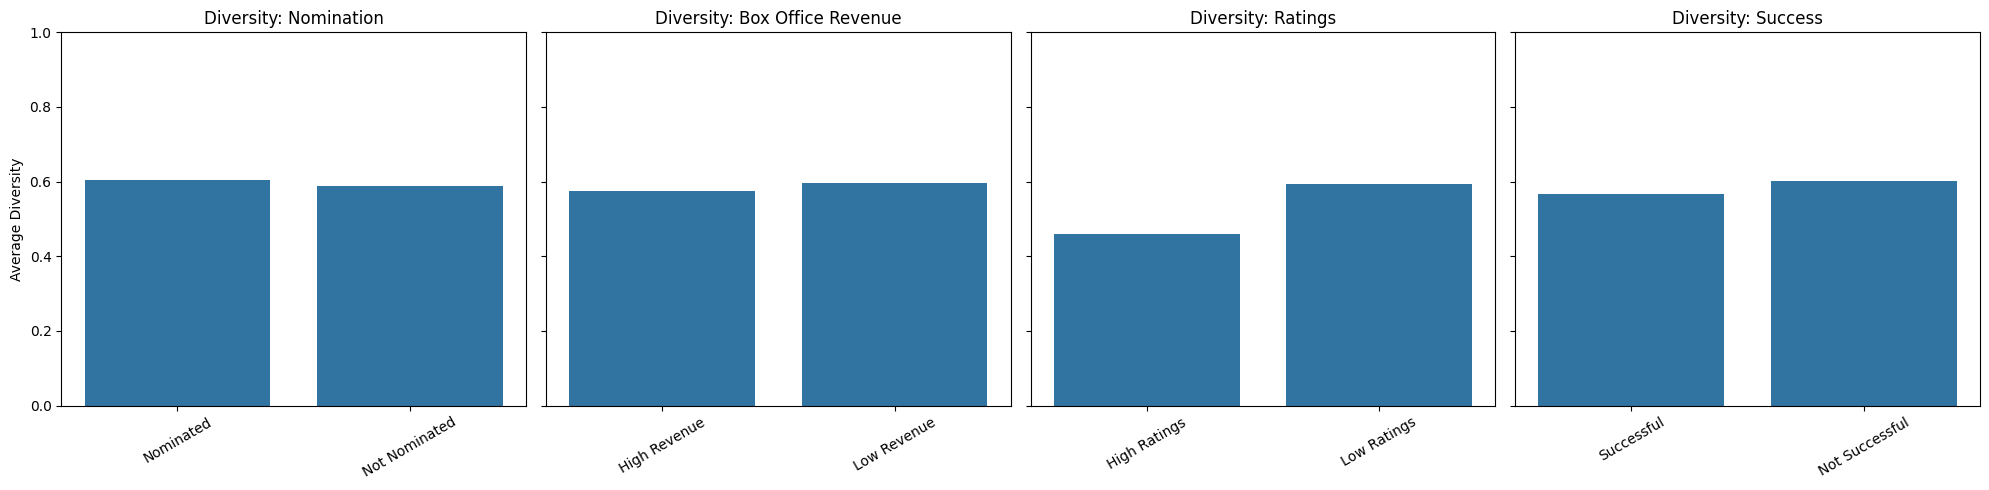

In [46]:
mean_diversity (38119483, 8, ethnicity_sucess_df)

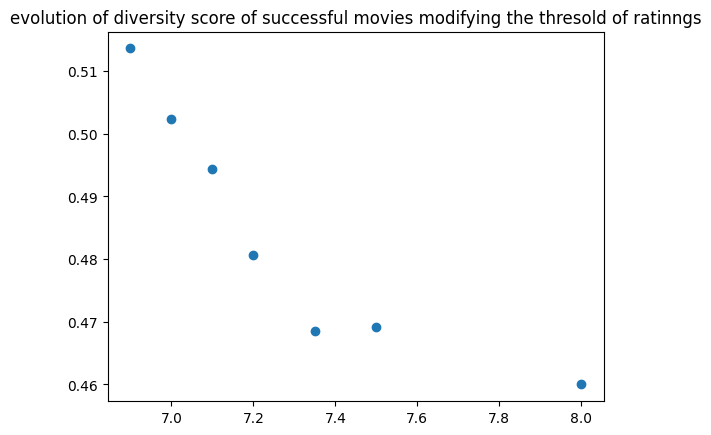

In [61]:
plt.scatter((6.9,7,7.1, 7.2,7.35,7.5, 8),(0.5136,0.5024,0.4943,0.4806,0.4685,0.4691,0.4600))
plt.title('evolution of diversity score of successful movies modifying the thresold of ratinngs')
plt.show()

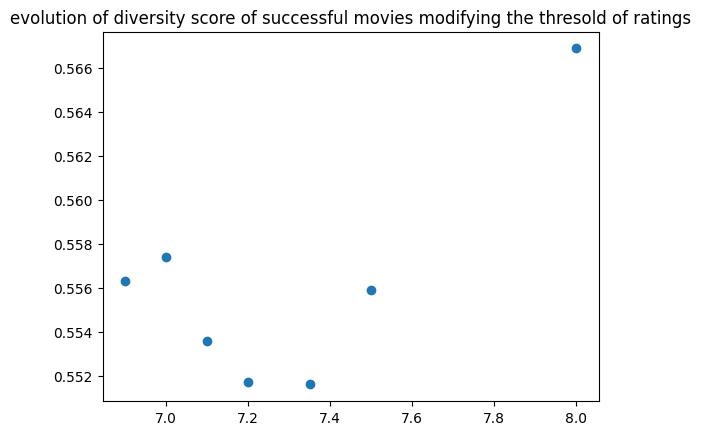

In [62]:
plt.scatter((6.9,7,7.1, 7.2, 7.35, 7.5, 8),(0.5563,0.5574,0.5536,0.5517,0.5516,0.5559,0.5669))
plt.title('evolution of diversity score of successful movies modifying the thresold of ratings')
plt.show()

#### b) threshold on the box office revenue

Average diversity for film nominated:0.6051
Average diversity for film not nominated:0.5882
Average diversity for film with high box revenue:0.5895
Average diversity for film with lower box revenue:0.5918
Average diversity for film with high ratings:0.4691
Average diversity for film with lower ratings:0.6037
Average diversity for film sucessful :0.5724
Average diversity for film less sucessful :0.6036


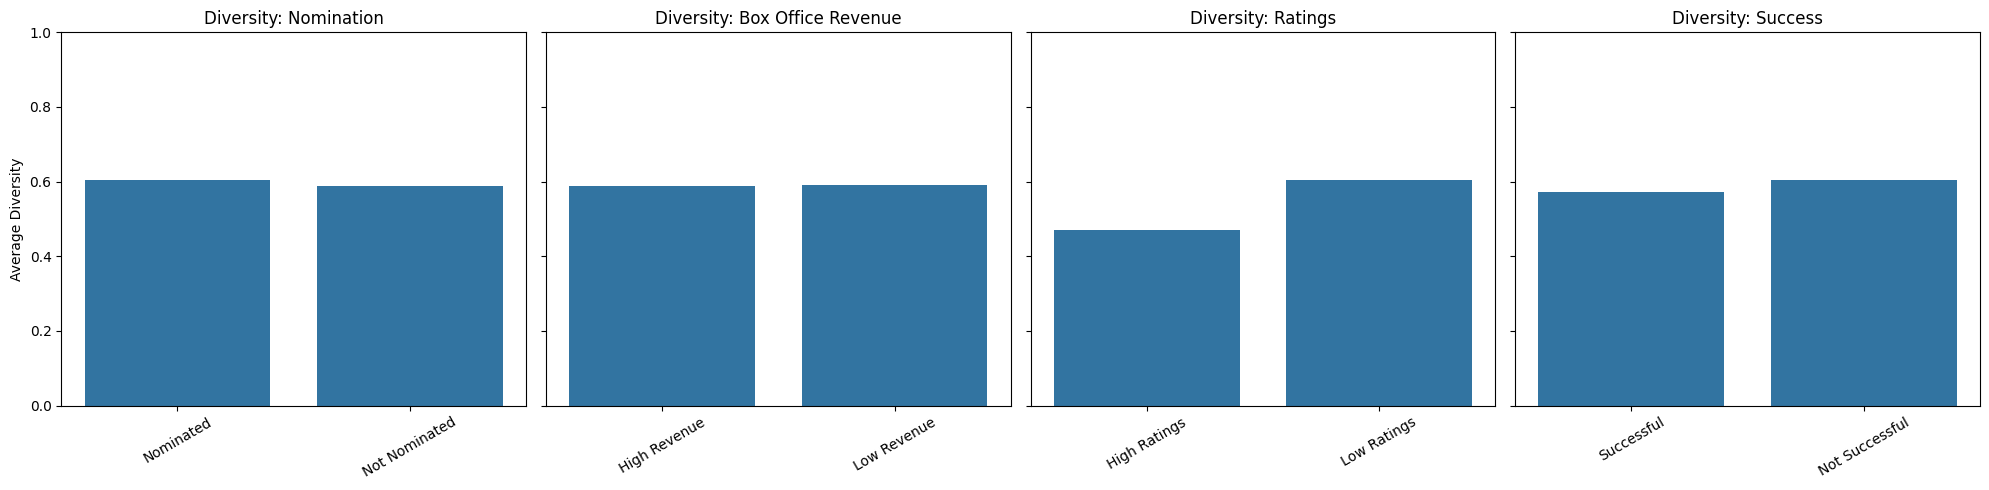

In [51]:
mean_diversity (23963802.0, 7.5, ethnicity_sucess_df)

Average diversity for film nominated:0.6051
Average diversity for film not nominated:0.5882
Average diversity for film with high box revenue:0.5667
Average diversity for film with lower box revenue:0.5922
Average diversity for film with high ratings:0.4691
Average diversity for film with lower ratings:0.6037
Average diversity for film sucessful :0.4949
Average diversity for film less sucessful :0.6064


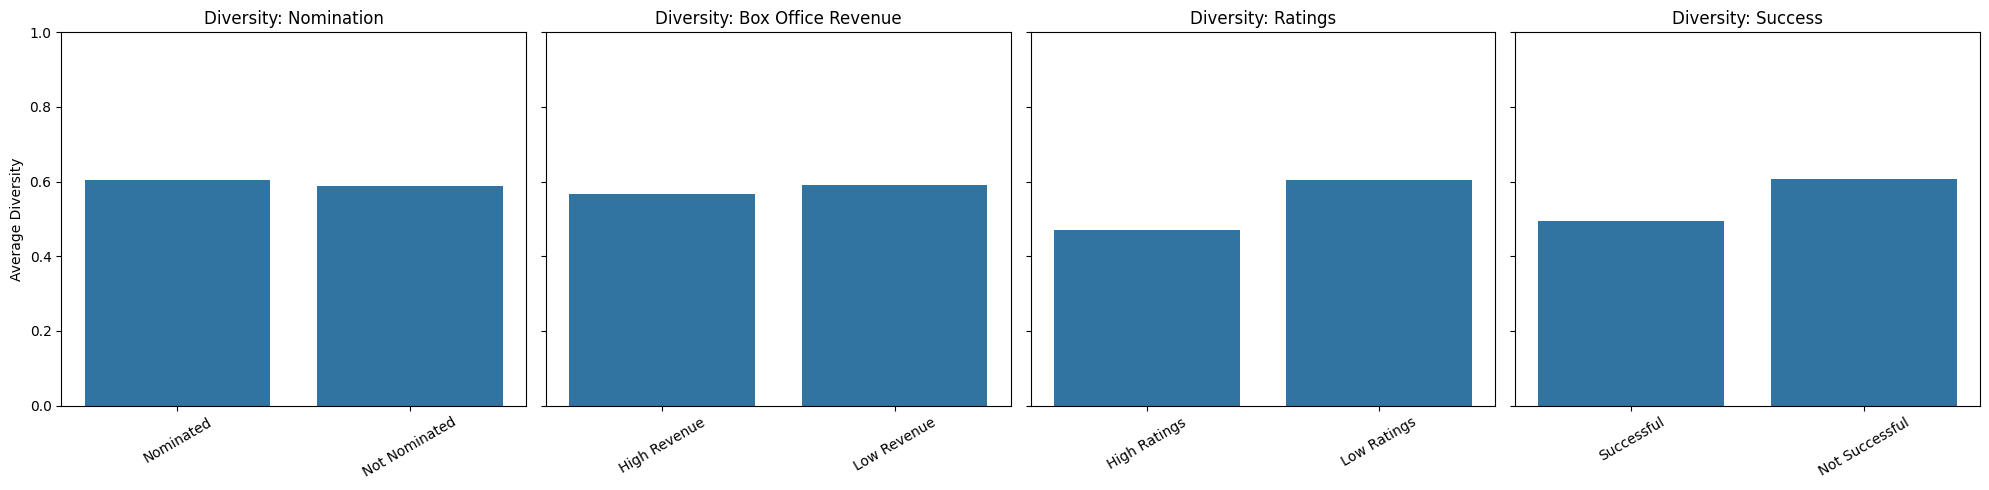

In [66]:
mean_diversity (260101386.5, 7.5, ethnicity_sucess_df)

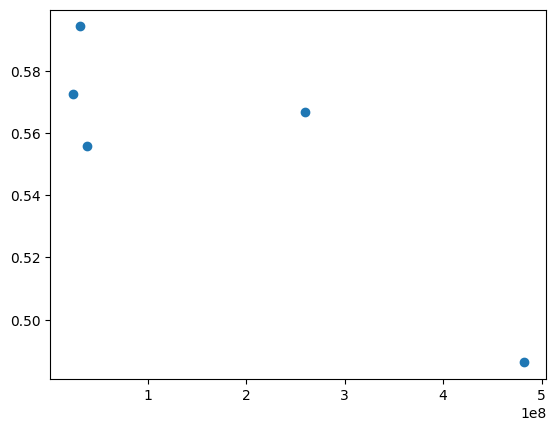

In [67]:
plt.scatter((23963802,31041642.5,38119483,260101386.5,482083290), (0.5724, 0.5943,0.5559, 0.5667,0.4863))
plt.show()

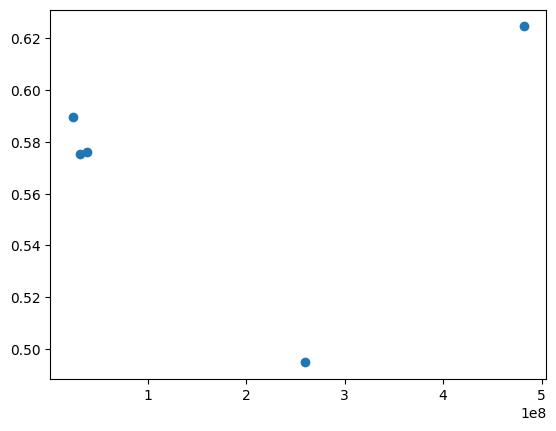

In [68]:
plt.scatter((23963802,31041642.5,38119483,260101386.5,482083290), (0.5895,0.5754,0.5760, 0.4949,0.6246))
plt.show()

## 4) Propensity score matching. 

Many confounders can influence the success of a film. Let's try to isolate the effect of diversity on the sucess of a film. Treatment is diversity. Considered as treated if the diversity score is superior to 0.47. control if the diversity score is inferior to 0.47. 

By completing the paired matching, we try to compare movies with similar probability of receiving the treatment, which in our case is an ethnicity score. We used logistic regression to compute the propensity score based on the movie runtime, the year the movie was released, the number of languages present, and the number of countries the film producing the film.

In [17]:
# Import sys to modify the Python path
import sys

# Add the folder containing the module to the Python path
sys.path.insert(1, r'src\data')

# Import the main function from the module
import cleaning_data

character_metadata_path = 'data/raw_data/character.metadata.tsv'
movie_metadata_path = 'data/raw_data/movie.metadata.tsv'
ethnicity_map_path = 'data/raw_data/fb_wiki_mapping.tsv'

# Call the main function
final_cleaned_data = cleaning_data.main(movie_metadata_path, character_metadata_path, ethnicity_map_path)

# Preview the cleaned data
if final_cleaned_data is not None:
    display(final_cleaned_data)

/Users/mathildeballot/Desktop/EPFL/cours/CS/ada-2024-project-inspiration/cleaning_data.py:245: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



Cleaned data saved to data/preprocess_data/clean_dataset.csv


,Wikipedia_movie_ID,Movie_release_date,Actor_ethnicity,Movie_name,Movie_runtime,Movie_languages,Movie_countries
10,3196793,2000,African Americans,Getting Away with Murder: The JonBenét Ramsey ...,95.0,English Language,United States of America
57,18768079,1938,Jewish people,Fast Company,75.0,English Language,United States of America
59,612710,1999,Italians,New Rose Hotel,92.0,English Language,United States of America
60,612710,1999,German Americans,New Rose Hotel,92.0,English Language,United States of America
83,156558,2001,African Americans,Baby Boy,123.0,English Language,United States of America
...,...,...,...,...,...,...,...
450568,24997872,2010,Malayali,Pokkiri Raja,136.0,Malayalam Language,India
450569,24997872,2010,Indian,Pokkiri Raja,136.0,Malayalam Language,India
450614,30553937,1998,Irish Americans,Confessions of a Sexist Pig,91.0,English Language,United States of America
450626,12476867,2002,Jewish people,Spliced,86.0,English Language,Canada


In [18]:
ethnicity_sucess_df= ethnicity_sucess_df.drop(['Movie_countries'], axis=1)
ethnicity_sucess_df['Movie_release_date'] = np.float64(ethnicity_sucess_df['Movie_release_date'])
final_cleaned_data['Movie_release_date'] = np.float64(final_cleaned_data['Movie_release_date'])

In [19]:
data=pd.merge(final_cleaned_data,ethnicity_sucess_df,on= ['Wikipedia_movie_ID','Movie_name','Movie_release_date','Actor_ethnicity'], how='inner')
def count_countries(countries_str):
    # Séparer les pays en fonction de la virgule et compter le nombre de pays
    countries = countries_str.split(',')  # Split par la virgule
    return len(countries)

def count_languages(languages_str):
    # Séparer les pays en fonction de la virgule et compter le nombre de pays
    languages = languages_str.split(',')  # Split par la virgule
    return len(languages)

data['Number_of_countries'] = data['Movie_countries'].apply(count_countries)
data['Number_of_languages'] = data['Movie_languages'].apply(count_languages)

In [ ]:
data['treat'] = (data['diversity'] >= 0.47).astype(int)


np.int64(539)

In [25]:
# let's standardize the continuous features
data['Movie_release_date'] = (data['Movie_release_date'] - data['Movie_release_date'].mean())/data['Movie_release_date'].std()
data['Movie_runtime'] = (data['Movie_runtime'] - data['Movie_runtime'].mean())/data['Movie_runtime'].std()
data['Number_of_countries'] = (data['Number_of_countries'] - data['Number_of_countries'].mean())/data['Number_of_countries'].std()
data['Number_of_languages'] = (data['Number_of_languages'] - data['Number_of_languages'].mean())/data['Number_of_languages'].std()

mod = smf.logit(formula= 'diversity ~  Movie_release_date + Movie_runtime + Number_of_countries + Number_of_languages' , data=data)
res = mod.fit()

# Extract the estimated propensity scores
data['Propensity_score'] = res.predict()

print(res.summary())

Optimization terminated successfully.
         Current function value: 0.636950
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              diversity   No. Observations:                 1191
Model:                          Logit   Df Residuals:                     1186
Method:                           MLE   Df Model:                            4
Date:                Thu, 12 Dec 2024   Pseudo R-squ.:                 0.07506
Time:                        18:08:03   Log-Likelihood:                -758.61
converged:                       True   LL-Null:                       -820.17
Covariance Type:            nonrobust   LLR p-value:                 1.148e-25
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.1912      0.061      3.112      0.002       0.071       0.312
Mo

In [28]:
def get_similarity(propensity_score1, propensity_score2):
    '''Calculate similarity for instances with given propensity scores'''
    return 1-np.abs(propensity_score1-propensity_score2)

In [27]:
# Separate the treatment and control groups
treatment_df = data[data['diversity'] == 1]
control_df = data[data['diversity'] == 0]

# Create an empty undirected graph
G = nx.Graph()

# Loop through all the pairs of instances
for control_id, control_row in control_df.iterrows():
    for treatment_id, treatment_row in treatment_df.iterrows():

        # Calculate the similarity 
        similarity = get_similarity(control_row['Propensity_score'],
                                    treatment_row['Propensity_score'])

        # Add an edge between the two instances weighted by the similarity between them
        G.add_weighted_edges_from([(control_id, treatment_id, similarity)])

# Generate and return the maximum weight matching on the generated graph
matching = nx.max_weight_matching(G)

In [28]:
matched = [i[0] for i in list(matching)] + [i[1] for i in list(matching)]

In [29]:
balanced_df_1 = data.iloc[matched]

In [30]:
treat = balanced_df_1[balanced_df_1['diversity'] == 1]
non_treat = balanced_df_1[balanced_df_1['diversity'] == 0]

In [34]:
y_treat=treat['Ratings'].sum()
y_control=non_treat['Ratings'].sum()
N=len(matching)
ATE= (1/N)* (y_treat-y_control)
print(f"Average Treatment Effect (ATE) : {ATE}")

Average Treatment Effect (ATE) : -0.0003710575139143193


In [35]:
y_treat=treat['Movie_box_office_revenue'].sum()
y_control=non_treat['Movie_box_office_revenue'].sum()
N=len(matching)
ATE= (1/N)* (y_treat-y_control)
print(f"Average Treatment Effect (ATE) : {ATE}")

Average Treatment Effect (ATE) : -3264432.3339517624


In [36]:
treat.Movie_box_office_revenue.describe()

count    5.390000e+02
mean     4.510191e+07
std      9.971443e+07
min      1.185900e+04
25%      2.000486e+06
50%      8.266343e+06
75%      3.597722e+07
max      9.198388e+08
Name: Movie_box_office_revenue, dtype: float64

In [37]:
non_treat.Movie_box_office_revenue.describe()

count    5.390000e+02
mean     4.836634e+07
std      9.462275e+07
min      1.180700e+04
25%      2.225000e+06
50%      1.082782e+07
75%      4.445927e+07
max      7.097098e+08
Name: Movie_box_office_revenue, dtype: float64

In [38]:
balanced_df_1['Success'] = balanced_df_1['Success'].replace({False: 0, True: 1})

/var/folders/w7/t9sglxkj5nz7xv4mxk5dftlh0000gn/T/ipykernel_1707/1946030893.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/var/folders/w7/t9sglxkj5nz7xv4mxk5dftlh0000gn/T/ipykernel_1707/1946030893.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Calculate the ATE based on matched pairs. 
y_treat=treatment_df['Success'].sum()
y_control=control_df['Success'].sum()
N=len(matching)
ATE= (1/N)* (y_treat-y_control)
print(f"Average Treatment Effect (ATE) : {ATE}")

Average Treatment Effect (ATE) : 0.00927643784786642


Tester un autre intervalle? 

In [25]:
data['treat'] = (data['diversity'] >= 0.95).astype(int)

In [26]:
# let's standardize the continuous features
data['Movie_release_date'] = (data['Movie_release_date'] - data['Movie_release_date'].mean())/data['Movie_release_date'].std()
data['Movie_runtime'] = (data['Movie_runtime'] - data['Movie_runtime'].mean())/data['Movie_runtime'].std()
data['Number_of_countries'] = (data['Number_of_countries'] - data['Number_of_countries'].mean())/data['Number_of_countries'].std()
data['Number_of_languages'] = (data['Number_of_languages'] - data['Number_of_languages'].mean())/data['Number_of_languages'].std()

mod = smf.logit(formula= 'treat ~  Movie_release_date + Movie_runtime + Number_of_countries + Number_of_languages' , data=data)
res = mod.fit()

# Extract the estimated propensity scores
data['Propensity_score'] = res.predict()

print(res.summary())

Optimization terminated successfully.
         Current function value: 0.619825
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  treat   No. Observations:                 1191
Model:                          Logit   Df Residuals:                     1186
Method:                           MLE   Df Model:                            4
Date:                Thu, 12 Dec 2024   Pseudo R-squ.:                 0.05366
Time:                        18:43:51   Log-Likelihood:                -738.21
converged:                       True   LL-Null:                       -780.07
Covariance Type:            nonrobust   LLR p-value:                 2.848e-17
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.6229      0.064     -9.744      0.000      -0.748      -0.498
Mo

In [29]:
# Separate the treatment and control groups
treatment_df = data[data['treat'] == 1]
control_df = data[data['treat'] == 0]

# Create an empty undirected graph
G = nx.Graph()

# Loop through all the pairs of instances
for control_id, control_row in control_df.iterrows():
    for treatment_id, treatment_row in treatment_df.iterrows():

        # Calculate the similarity 
        similarity = get_similarity(control_row['Propensity_score'],
                                    treatment_row['Propensity_score'])

        # Add an edge between the two instances weighted by the similarity between them
        G.add_weighted_edges_from([(control_id, treatment_id, similarity)])

# Generate and return the maximum weight matching on the generated graph
matching = nx.max_weight_matching(G)

In [30]:
matched = [i[0] for i in list(matching)] + [i[1] for i in list(matching)]
balanced_df_1 = data.iloc[matched]

In [31]:
treat = balanced_df_1[balanced_df_1['treat'] == 1]
control = balanced_df_1[balanced_df_1['treat'] == 0]
balanced_df_1['Success'] = balanced_df_1['Success'].replace({False: 0, True: 1})

/var/folders/w7/t9sglxkj5nz7xv4mxk5dftlh0000gn/T/ipykernel_1971/3238643363.py:3: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/var/folders/w7/t9sglxkj5nz7xv4mxk5dftlh0000gn/T/ipykernel_1971/3238643363.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [32]:
# Calculate the ATE based on matched pairs. 
y_treat=treat['Success'].sum()
y_control=control['Success'].sum()
N=len(matching)
ATE= (1/N)* (y_treat-y_control)
print(f"Average Treatment Effect (ATE) : {ATE}")

Average Treatment Effect (ATE) : -0.027777777777777776


In [33]:
y_treat=treat['Ratings'].sum()
y_control=control['Ratings'].sum()
N=len(matching)
ATE= (1/N)* (y_treat-y_control)
print(f"Average Treatment Effect (ATE) : {ATE}")

Average Treatment Effect (ATE) : -0.1240740740740749


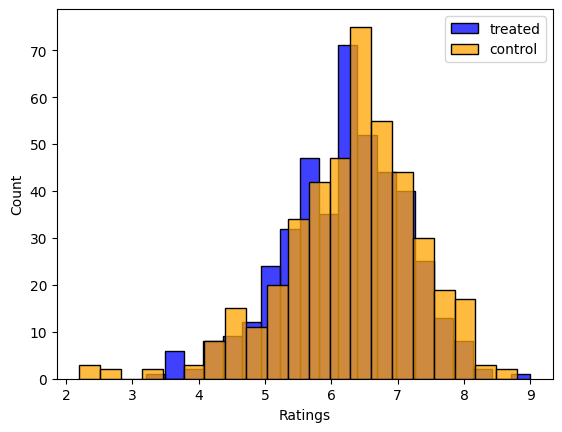

In [43]:
ax = sns.histplot(treat['Ratings'], color='blue', label='treated')
ax = sns.histplot(control['Ratings'], color='orange', label='control')
plt.legend()
plt.show()

In [70]:
treat.Movie_box_office_revenue.describe()

count    4.320000e+02
mean     4.661569e+07
std      9.759725e+07
min      1.185900e+04
25%      2.149119e+06
50%      1.049921e+07
75%      3.870482e+07
max      7.582399e+08
Name: Movie_box_office_revenue, dtype: float64

In [69]:
control.Movie_box_office_revenue.describe()

count    4.320000e+02
mean     4.504568e+07
std      9.695491e+07
min      1.180700e+04
25%      2.499308e+06
50%      9.992730e+06
75%      3.775666e+07
max      9.198388e+08
Name: Movie_box_office_revenue, dtype: float64

In [38]:
y_treat=treat['Movie_box_office_revenue'].sum()
y_control=control['Movie_box_office_revenue'].sum()
N=len(matching)
ATE= (1/N)* (y_treat-y_control)
print(f"Average Treatment Effect (ATE) : {ATE}")

Average Treatment Effect (ATE) : 1570015.4907407407


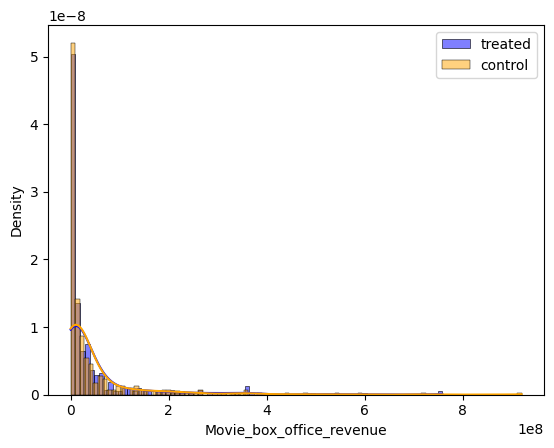

In [41]:
ax = sns.histplot(treat['Movie_box_office_revenue'], kde=True, stat='density', color='blue', label='treated')
ax = sns.histplot(control['Movie_box_office_revenue'], kde=True, stat='density', color='orange', label='control')
plt.legend()
plt.show()

In [39]:
balanced_df_1['Nomination'] = balanced_df_1['Nomination'].replace({False: 0, True: 1})

/var/folders/w7/t9sglxkj5nz7xv4mxk5dftlh0000gn/T/ipykernel_1971/4232909051.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/var/folders/w7/t9sglxkj5nz7xv4mxk5dftlh0000gn/T/ipykernel_1971/4232909051.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [40]:
y_treat=treat['Nomination'].sum()
y_control=control['Nomination'].sum()
N=len(matching)
ATE= (1/N)* (y_treat-y_control)
print(f"Average Treatment Effect (ATE) : {ATE}")

Average Treatment Effect (ATE) : -0.037037037037037035
